In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from random import randint

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [3]:
for col in df.columns:
    print(col)
    print(sorted(df[col].unique()), '\n')

location
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138] 

country
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 

gender
[0, 1, 2] 

age
[2.0, 4.0, 5.0, 6.0, 8.0, 9.0, 11.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49

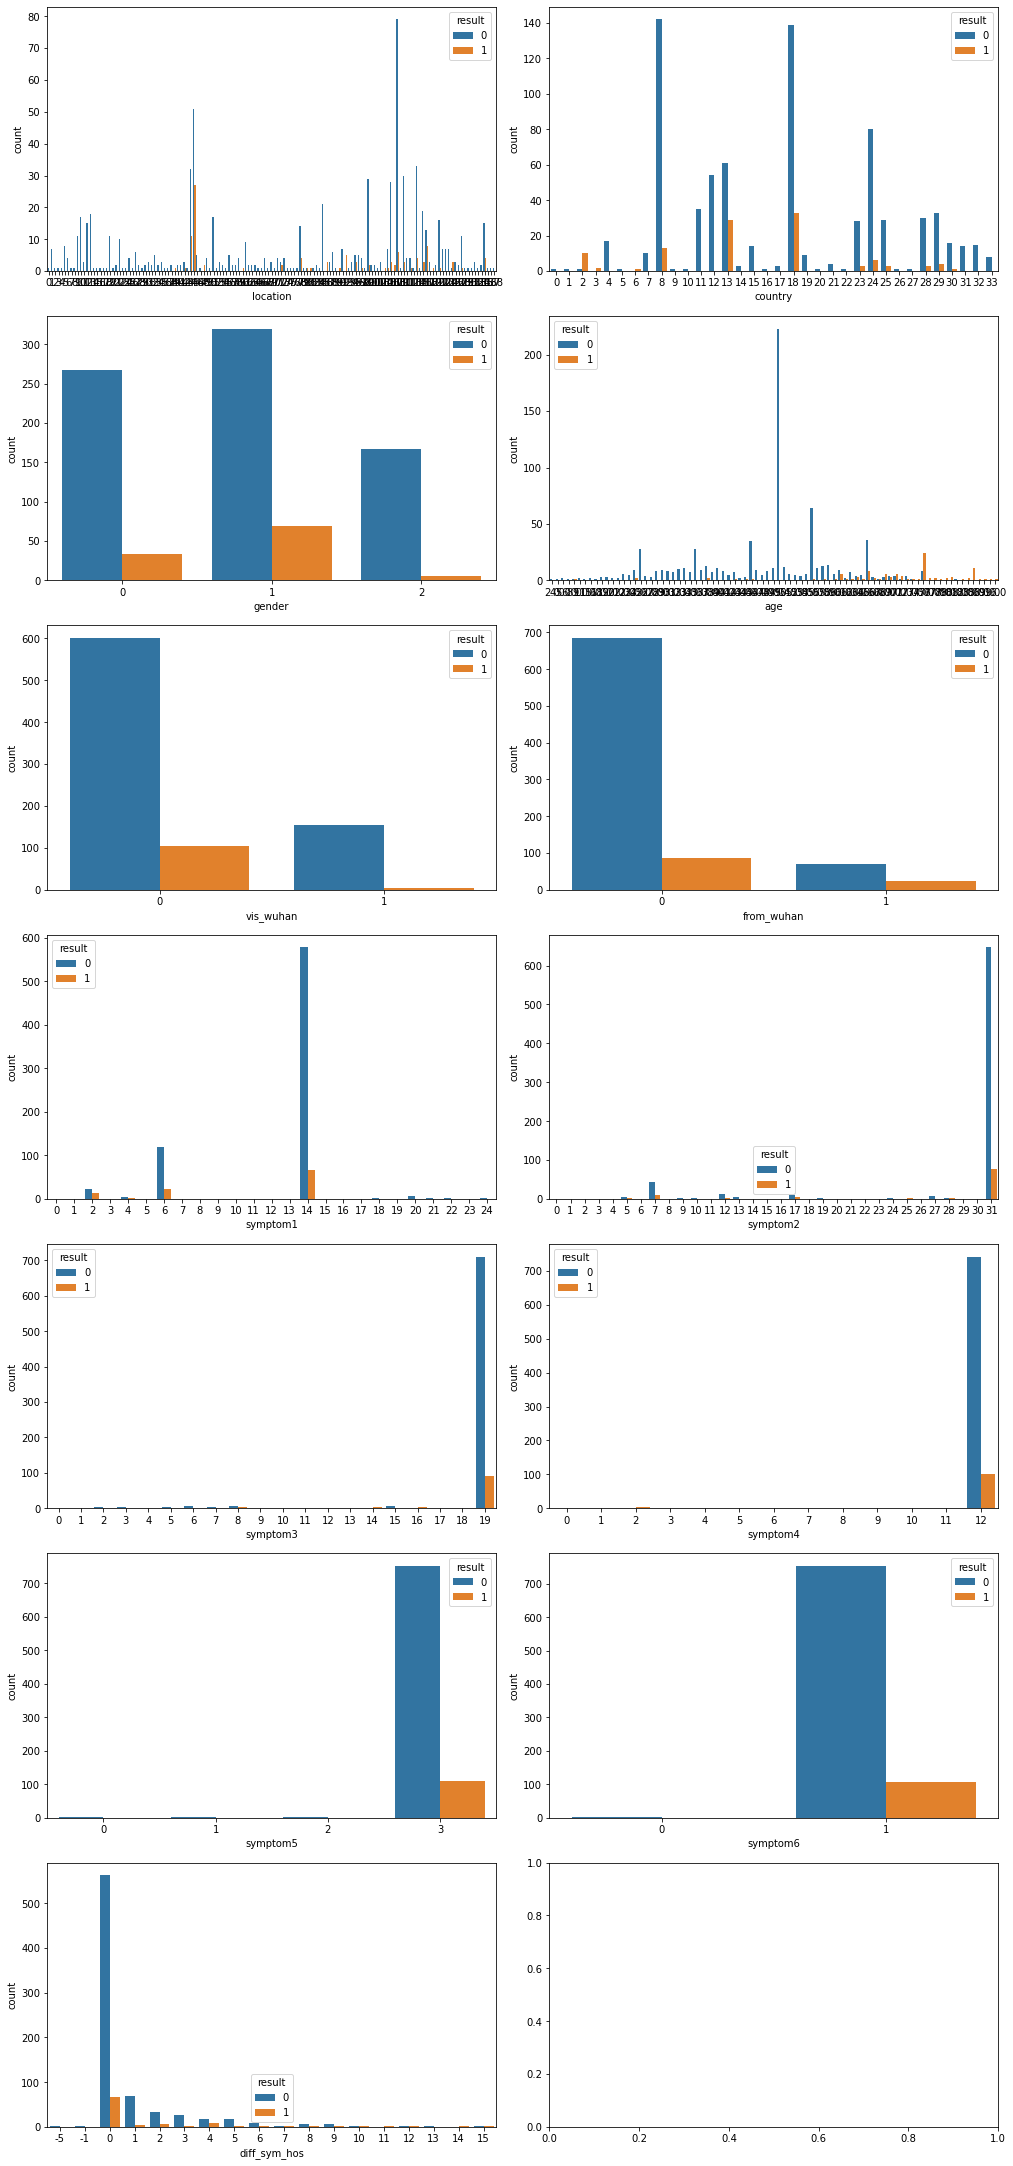

In [4]:
# def sephist(col):
#     ones = df[df['result'] == 1][col]
#     zeros = df[df['result'] == 0][col]
#     return ones, zeros

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(14, 30))
for i in range(13):
#     ax[i // 2][i % 2].hist(sephist(df.columns[i]), alpha=0.5, label=[1, 0], color=['r', 'b'])
#     ax[i // 2][i % 2].legend(loc='upper right')
#     ax[i // 2][i % 2].set_title(df.columns[i])
    sns.countplot(x=df.columns[i],hue='result',data=df, ax=ax[i//2][i%2])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

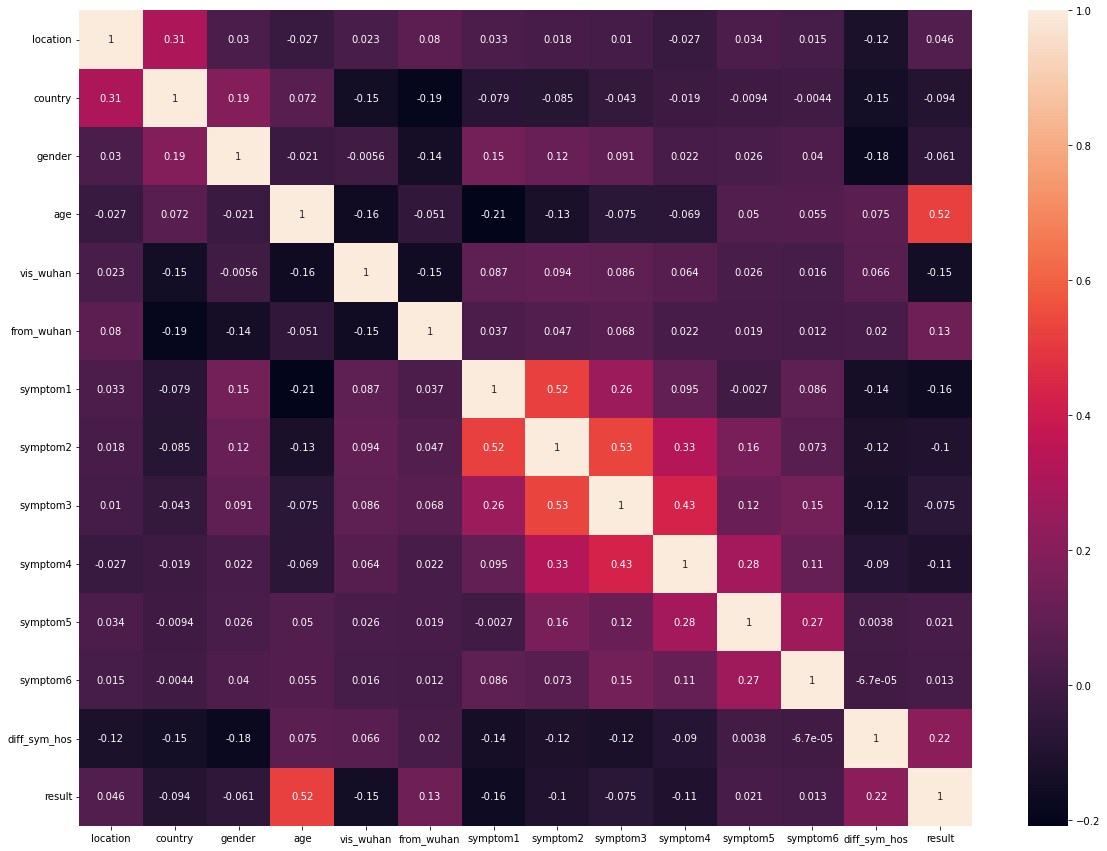

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True)

# Cleaning
gender and hours

In [6]:
for i in range(len(df)):
    df.iloc[i, 12] = df.iloc[i,12]*-1 if df.iloc[i, 12] < 0 else df.iloc[i, 12]
df['gender'] = df['gender'].mask(df['gender'] == 2, 1)

# Methods

In [7]:
# drop columns form the given data frame
def drop(dropped_columns, df):
    df_dropped = df.copy()
    for col in dropped_columns:
        df_dropped.drop(col, axis=1, inplace=True)
    return df_dropped

In [8]:
# one hot encoding
def encode(columns, df):
    df_encoded = df.copy()
    for col in columns:
        encoding = pd.get_dummies(df[col], prefix=col)
        df_encoded = df_encoded.join(encoding)
        df_encoded.drop(col, axis=1, inplace=True)
    return df_encoded

In [9]:
# scaling
def scale(scaled_columns, df):
    df_scaled = df.copy()
    scaler =MinMaxScaler()
    for col in scaled_columns:
        df_scaled[col] = scaler.fit_transform(df_scaled[col].to_numpy()[:,np.newaxis])[:,0]
    return df_scaled

In [10]:
def split(df):
    x = df.drop('result', axis=1)
    y = df['result']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=42)
    X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5,shuffle=True, random_state=42)
    return X_train, X_validate, X_test, y_train, y_validate, y_test

## attempt to do kfold
don't know how to do it really ????????????\
### confused as hell and don't know what to do with the next two sells

In [11]:
def k_fold_split(X, y):
    k_fold = KFold(n_splits=5, random_state=42, shuffle=True)
    X_train_sets, X_test_sets = [], []
    y_train_sets, y_test_sets = [], []
    for train_index, test_index in k_fold.split(X):
        X_train_sets.append(X[train_index])
        y_train_sets.append(y[train_index])
        X_test_sets.append(X[test_index])
        y_test_sets.append(y[test_index])
    return X_train_sets, X_test_sets, y_train_sets, y_test_sets

In [12]:
def do_k_fold(clf, X, y):
    X_train_sets, X_test_sets, y_train_sets, y_test_sets = k_fold_split(X, y)
    
    for i in range(len(X_train_sets)):
        clf.fit(train_sets[i], )
        precision, recall, roc_auc, F1 = predict_and_score(knn, t, y_validate)

In [13]:
def predict_and_score(clf,X, y, average='binary'):
    y_predict = clf.predict(X)
    precision= precision_score(y, y_predict,average=average)
    recall = recall_score(y,y_predict,average=average)
    roc_auc = roc_auc_score(y, y_predict)
    F1 = f1_score(y, y_predict)
    return precision, recall, F1, roc_auc

In [14]:
def knn_validate(X_train, X_validate, y_train, y_validate, score='recall'):
    dic = {'clf':[], 'recall':[], 'precision':[], 'f1':[], 'roc_auc':[]}
    weights = ['distance', 'uniform']
    for k in range(1, int(len(X_train) ** 0.5), 2):
        for weight in weights: 
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
            knn.fit(X_train, y_train)
            precision, recall, roc_auc, F1 = predict_and_score(knn, X_validate, y_validate)
            dic['clf'].append(knn)
            dic['recall'].append(recall)
            dic['precision'].append(precision)
            dic['f1'].append(F1)
            dic['roc_auc'].append(roc_auc)
    df_scores = pd.DataFrame(dic)
    max_index = df_scores[score].idxmax()
    return df_scores.iloc[max_index, 0]

In [15]:
def logistic_validate(X_trian, X_validate, y_train, y_validate, score='recall'):
    dic = {'clf':[], 'recall':[], 'precision':[], 'f1':[], 'roc_auc':[]}
    
    weights = []
    for i in np.arange(0.01,1,0.05):
        weights.append({0:1 - i, 1:i})
    weights.append('balanced')
    for weight in weights: 
        logistic = LogisticRegression(class_weight=weight,random_state=42, max_iter=1000)
        logistic.fit(X_train, y_train)
        precision, recall, roc_auc, F1 = predict_and_score(logistic, X_validate, y_validate)
        dic['clf'].append(logistic)
        dic['recall'].append(recall)
        dic['precision'].append(precision)
        dic['f1'].append(F1)
        dic['roc_auc'].append(roc_auc)
    df_scores = pd.DataFrame(dic)
    max_index = df_scores[score].idxmax()
    return df_scores.iloc[max_index, 0]

In [16]:
def gnb_validate(X_train, X_validate, y_train, y_validate, score='recall'):
    dic = {'clf':[], 'recall':[], 'precision':[], 'f1':[], 'roc_auc':[]}
    for var in np.logspace(0,-9, num=100): 
        gnb = GaussianNB(var_smoothing=var)
        gnb.fit(X_train, y_train)
        precision, recall, roc_auc, F1 = predict_and_score(gnb, X_validate, y_validate)
        dic['clf'].append(gnb)
        dic['recall'].append(recall)
        dic['precision'].append(precision)
        dic['f1'].append(F1)
        dic['roc_auc'].append(roc_auc)
    df_scores = pd.DataFrame(dic)
    max_index = df_scores[score].idxmax()
    return df_scores.iloc[max_index, 0]

In [17]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    return predict_and_score(clf, X_test, y_test)

# KNN

## NO Encoding

In [18]:
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df)
best_knn = knn_validate(X_train, X_validate, y_train, y_validate)
train_test(best_knn, X_train, X_test, y_train, y_test)

(0.8461538461538461, 0.6875, 0.7586206896551724, 0.8296654929577465)

## Encoding

In [19]:
encoded_columns =['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'location', 'country']
df_encoded = encode(encoded_columns, df)
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_encoded)
best_knn = knn_validate(X_train, X_validate, y_train, y_validate)
print(best_knn)
train_test(best_knn, X_train, X_test, y_train, y_test)

KNeighborsClassifier(n_neighbors=7, weights='distance')


(0.9166666666666666, 0.6875, 0.7857142857142857, 0.8367077464788732)

## Scaling

Bad idea

In [20]:
# scaled_columns =['age', 'diff_sym_hos']
scaled_columns=['diff_sym_hos', 'age']
df_scaled = scale(scaled_columns,df_encoded )
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_scaled)
best_knn = knn_validate(X_train, X_validate, y_train, y_validate)
print(best_knn)
train_test(best_knn, X_train, X_test, y_train, y_test)

KNeighborsClassifier(n_neighbors=11, weights='distance')


(0.8571428571428571, 0.375, 0.5217391304347825, 0.6804577464788732)

## drop symptom6, 3, 2

In [21]:
dropped_columns = ['symptom6', 'symptom2', 'symptom3']
encoded_columns =['symptom1','symptom4', 'symptom5', 'location', 'country']
df_dropped = drop(dropped_columns, df)
df_encoded = encode(encoded_columns,df_dropped)
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_encoded)
best_knn = knn_validate(X_train, X_validate, y_train, y_validate)
print(best_knn)
train_test(best_knn, X_train, X_test, y_train, y_test)

KNeighborsClassifier(n_neighbors=1, weights='distance')


(0.8571428571428571, 0.75, 0.7999999999999999, 0.8609154929577465)

# Logistic Regression

## No encoding

In [22]:
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df)
best_logistic = logistic_validate(X_train, X_validate, y_train, y_validate)
print(best_logistic)
train_test(best_logistic, X_train, X_test, y_train, y_test)

LogisticRegression(class_weight={0: 0.18999999999999995, 1: 0.81},
                   max_iter=1000, random_state=42)


C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.75, 0.75, 0.75, 0.8468309859154929)

In [23]:
encoded_columns =['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'location', 'country']
df_encoded = encode(encoded_columns, df)
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_encoded)
best_logistic = logistic_validate(X_train, X_validate, y_train, y_validate)
print(best_logistic)
train_test(best_logistic, X_train, X_test, y_train, y_test)

LogisticRegression(class_weight={0: 0.24, 1: 0.76}, max_iter=1000,
                   random_state=42)


(0.8235294117647058, 0.875, 0.8484848484848485, 0.9163732394366197)

## scaling 
bad idea as usual

In [24]:
# scaled_columns =['age', 'diff_sym_hos']
scaled_columns=['diff_sym_hos', 'age']
df_scaled = scale(scaled_columns, df_encoded)
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_scaled)
best_logistic = logistic_validate(X_train, X_validate, y_train, y_validate)
print(best_logistic)
train_test(best_logistic, X_train, X_test, y_train, y_test)

C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics

LogisticRegression(class_weight={0: 0.039999999999999925,
                                 1: 0.9600000000000001},
                   max_iter=1000, random_state=42)


(0.2916666666666667, 0.875, 0.43750000000000006, 0.6980633802816901)

## drop symtpom6, 2, 3

In [25]:
dropped_columns = ['symptom6', 'symptom2', 'symptom3']
encoded_columns =['symptom1','symptom4', 'symptom5', 'location', 'country']
df_dropped = drop(dropped_columns, df)
df_encoded = encode(encoded_columns,df_dropped)
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_encoded)
best_logistic = logistic_validate(X_train, X_validate, y_train, y_validate)
print(best_logistic)
train_test(best_logistic, X_train, X_test, y_train, y_test)

LogisticRegression(class_weight={0: 0.24, 1: 0.76}, max_iter=1000,
                   random_state=42)


(0.8235294117647058, 0.875, 0.8484848484848485, 0.9163732394366197)

# bayes

In [26]:
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df)
best_gnb = gnb_validate(X_train, X_validate, y_train, y_validate)
print(best_gnb)
train_test(best_gnb, X_train, X_test, y_train, y_test)

C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics

GaussianNB(var_smoothing=1.519911082952933e-07)


(0.5, 0.875, 0.6363636363636364, 0.8389084507042255)

In [27]:
# scaled_columns =['age', 'diff_sym_hos']
scaled_columns=['diff_sym_hos', 'age']
df_scaled = scale(scaled_columns, df_encoded)
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_scaled)
best_gnb = gnb_validate(X_train, X_validate, y_train, y_validate)
print(best_gnb)
train_test(best_gnb, X_train, X_test, y_train, y_test)

GaussianNB(var_smoothing=0.0657933224657568)


(0.2830188679245283, 0.9375, 0.4347826086956522, 0.7011443661971831)

In [28]:
dropped_columns = ['symptom6', 'symptom2', 'symptom3']
encoded_columns =['symptom1','symptom4', 'symptom5', 'location', 'country']
df_dropped = drop(dropped_columns, df)
df_encoded = encode(encoded_columns,df_dropped)
X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_encoded)
best_gnb = gnb_validate(X_train, X_validate, y_train, y_validate)
print(best_gnb)
train_test(best_gnb, X_train, X_test, y_train, y_test)

C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mostafa Lotfy\.conda\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB(var_smoothing=0.001873817422860383)


(0.6666666666666666, 0.5, 0.5714285714285715, 0.7218309859154929)